In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV file into a DataFrame
file_path = "BTC-USD.csv"
df = pd.read_csv(file_path)

# Create a binary target variable indicating price increase (1) or decrease (0)
df['Price_Increase'] = (df['Close'] > df['Open']).astype(int)

# Select relevant features (you can adjust this based on your analysis)
features = ['Open', 'Close', 'High', 'Low', 'Volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Price_Increase'], test_size=0.2, random_state=42)

# Train a RandomForestClassifier (you can experiment with other algorithms)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_output = classification_report(y_test, predictions)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_output)


Model Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76       295
           1       0.79      0.79      0.79       345

    accuracy                           0.78       640
   macro avg       0.78      0.78      0.78       640
weighted avg       0.78      0.78      0.78       640



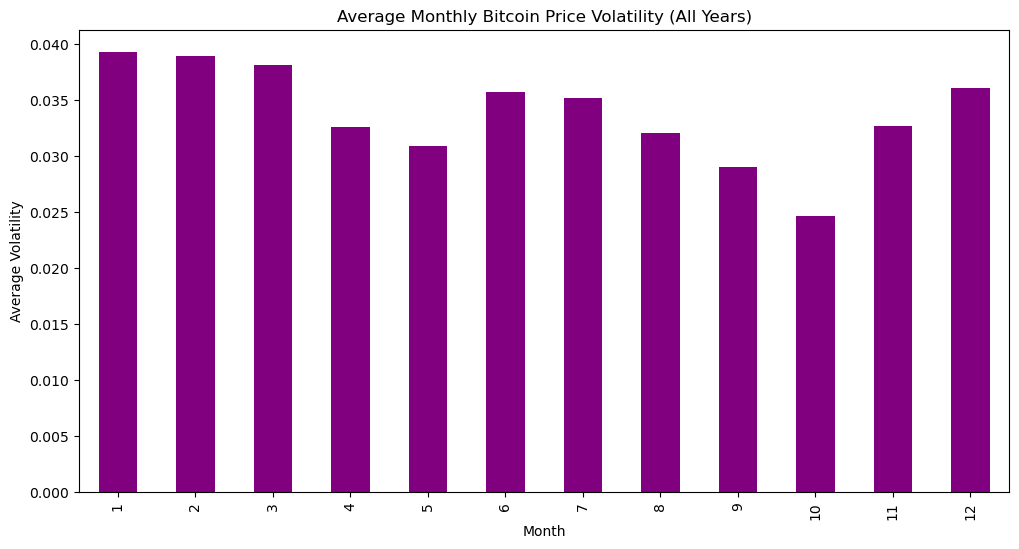

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('BTC-USD.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate rolling 30-day volatility (standard deviation of daily returns)
df['Volatility'] = df['Daily_Return'].rolling(window=30).std()

# Extract year and month from the index
df['Year'] = df.index.year
df['Month'] = df.index.month

# Group by month and calculate the average volatility for each month
monthly_avg_volatility = df.groupby(['Month'])['Volatility'].mean()

# Plot the average volatility for each month
plt.figure(figsize=(12, 6))
monthly_avg_volatility.plot(kind='bar', color='purple')
plt.title('Average Monthly Bitcoin Price Volatility (All Years)')
plt.xlabel('Month')
plt.ylabel('Average Volatility')
plt.show()


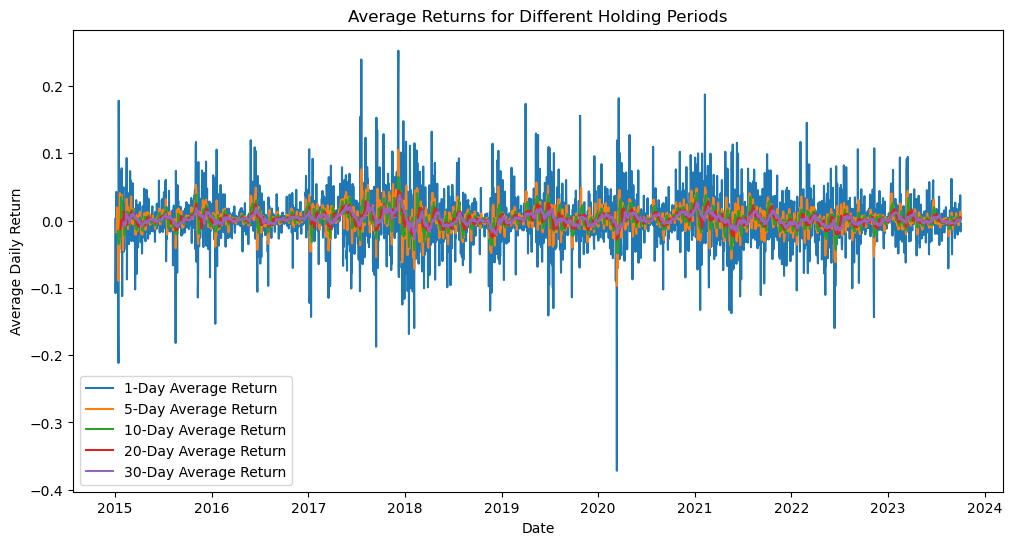

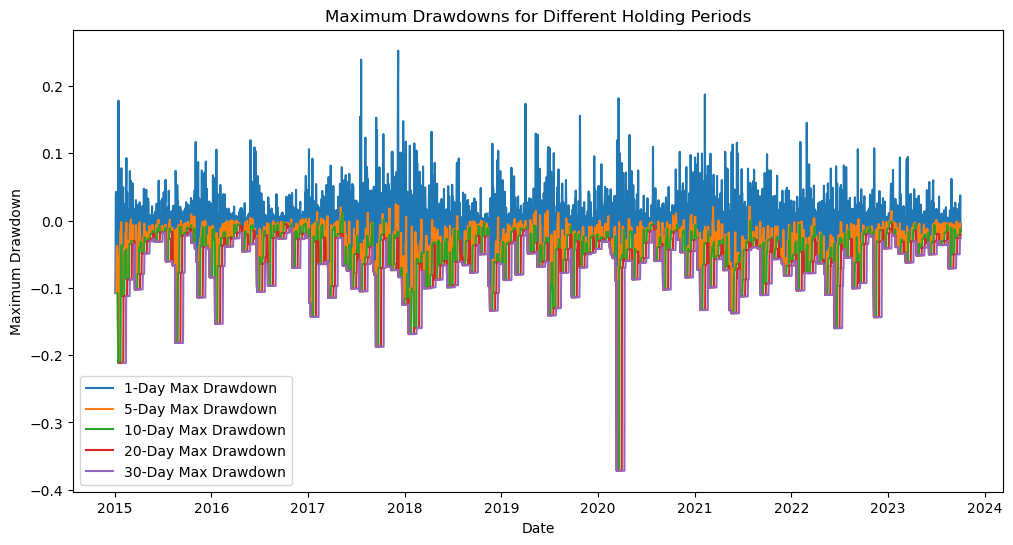

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('BTC-USD.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Drop rows with NaN values (resulting from calculating returns)
df.dropna(inplace=True)

# Define different holding periods
holding_periods = [1, 5, 10, 20, 30]

# Calculate and plot average returns
plt.figure(figsize=(12, 6))
for period in holding_periods:
    df[f'Average_Return_{period}'] = df['Daily_Return'].rolling(window=period).mean()
    plt.plot(df.index, df[f'Average_Return_{period}'], label=f'{period}-Day Average Return')

plt.title('Average Returns for Different Holding Periods')
plt.xlabel('Date')
plt.ylabel('Average Daily Return')
plt.legend()
plt.show()

# Calculate and plot maximum drawdowns
plt.figure(figsize=(12, 6))
for period in holding_periods:
    df[f'Max_Drawdown_{period}'] = df['Close'].pct_change().rolling(window=period).min()
    plt.plot(df.index, df[f'Max_Drawdown_{period}'], label=f'{period}-Day Max Drawdown')

plt.title('Maximum Drawdowns for Different Holding Periods')
plt.xlabel('Date')
plt.ylabel('Maximum Drawdown')
plt.legend()
plt.show()


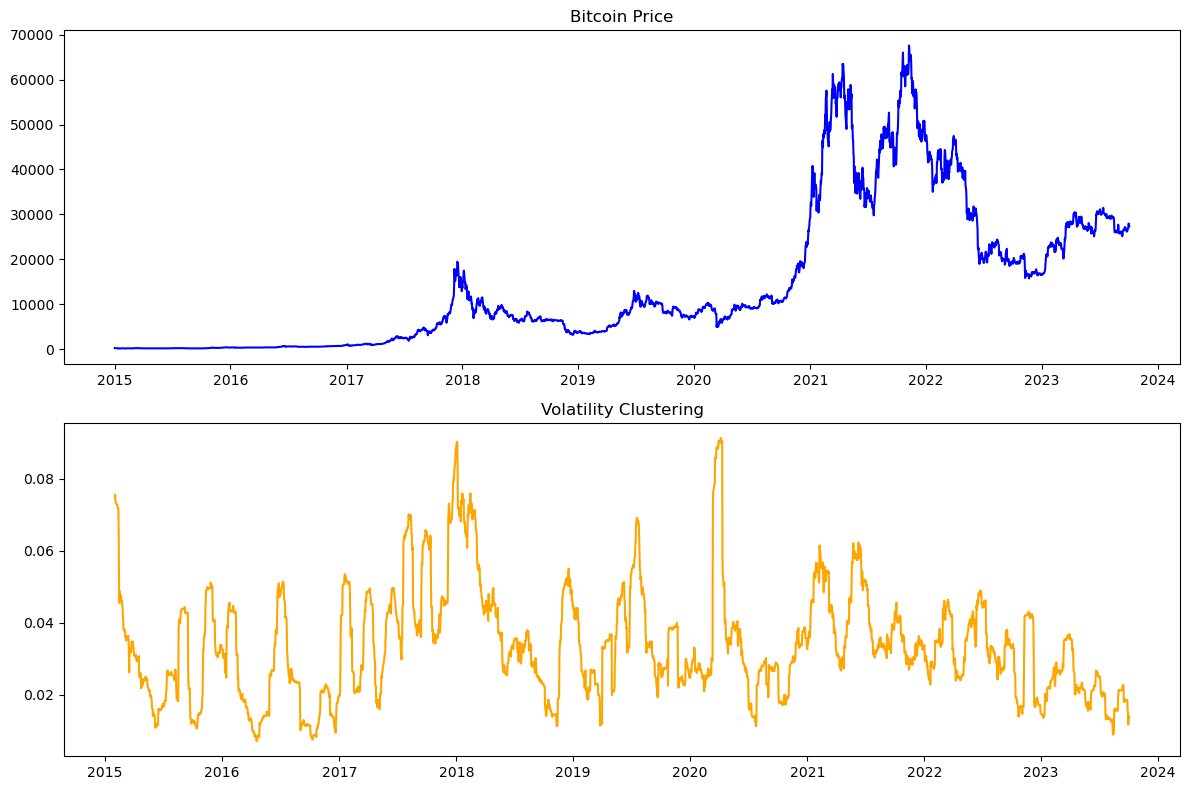

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('BTC-USD.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Drop rows with NaN values (resulting from calculating returns)
df.dropna(inplace=True)

# Calculate rolling 30-day volatility (standard deviation of daily returns)
df['Volatility'] = df['Daily_Return'].rolling(window=30).std()

# Plot the Bitcoin prices and rolling volatility
plt.figure(figsize=(12, 8))

# Plot Bitcoin prices
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label='Bitcoin Price', color='blue')
plt.title('Bitcoin Price')

# Plot rolling 30-day volatility
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Volatility'], label='Volatility (30-day)', color='orange')
plt.title('Volatility Clustering')

plt.tight_layout()
plt.show()


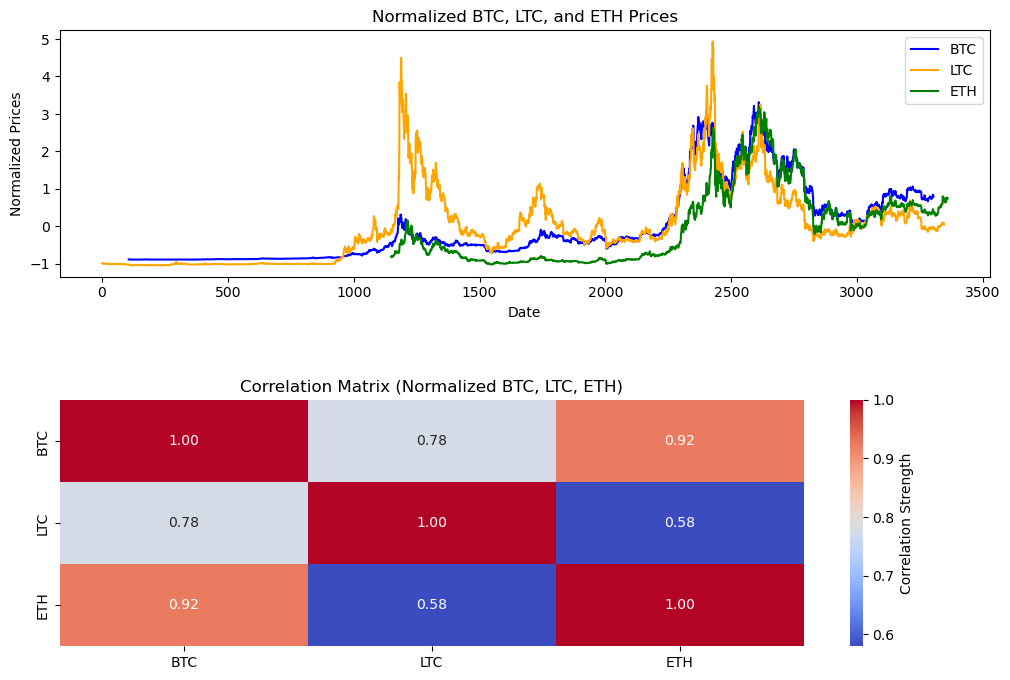

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the CSV data for BTC, LTC, and ETH into pandas DataFrames
df_btc = pd.read_csv('BTC-USD.csv', parse_dates=['Date'], index_col='Date')
df_ltc = pd.read_csv('LTC-USD.csv', parse_dates=['Date'], index_col='Date')
df_eth = pd.read_csv('ETH-USD.csv', parse_dates=['Date'], index_col='Date')

# Select the 'Close' prices for analysis
price_btc = df_btc['Close']
price_ltc = df_ltc['Close']
price_eth = df_eth['Close']

# Combine prices into a single DataFrame for correlation analysis
df_prices = pd.DataFrame({'BTC': price_btc, 'LTC': price_ltc, 'ETH': price_eth})

# Scale the data using z-scores
scaler = StandardScaler()
df_prices_scaled = pd.DataFrame(scaler.fit_transform(df_prices), columns=df_prices.columns)

# Calculate the correlation matrix
correlation_matrix = df_prices_scaled.corr()

# Plot the scaled prices and correlation matrix with increased spacing
plt.figure(figsize=(12, 8))

# Plot BTC, LTC, and ETH prices
plt.subplot(2, 1, 1)
plt.plot(df_prices_scaled.index, df_prices_scaled['BTC'], label='BTC', color='blue')
plt.plot(df_prices_scaled.index, df_prices_scaled['LTC'], label='LTC', color='orange')
plt.plot(df_prices_scaled.index, df_prices_scaled['ETH'], label='ETH', color='green')
plt.title('Normalized BTC, LTC, and ETH Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Prices')
plt.legend()

# Plot the correlation matrix as a heatmap
plt.subplot(2, 1, 2)
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Correlation Strength'})
plt.title('Correlation Matrix (Normalized BTC, LTC, ETH)')

# Increase spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()


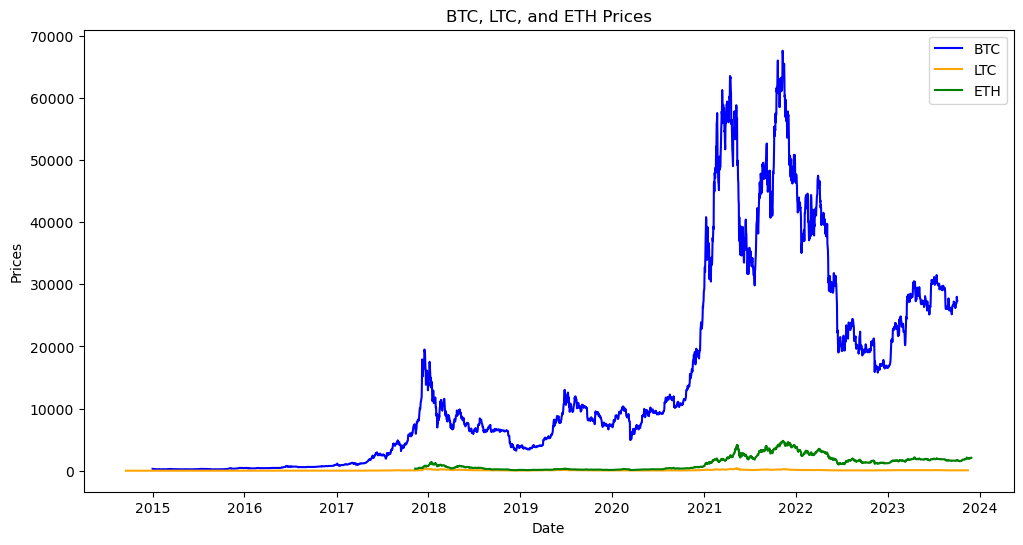

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data for BTC, LTC, and ETH into pandas DataFrames
df_btc = pd.read_csv('BTC-USD.csv', parse_dates=['Date'], index_col='Date')
df_ltc = pd.read_csv('LTC-USD.csv', parse_dates=['Date'], index_col='Date')
df_eth = pd.read_csv('ETH-USD.csv', parse_dates=['Date'], index_col='Date')

# Select the 'Close' prices for analysis
price_btc = df_btc['Close']
price_ltc = df_ltc['Close']
price_eth = df_eth['Close']

# Combine prices into a single DataFrame for correlation analysis
df_prices = pd.DataFrame({'BTC': price_btc, 'LTC': price_ltc, 'ETH': price_eth})

# Plot the original prices
plt.figure(figsize=(12, 6))

plt.plot(df_prices.index, df_prices['BTC'], label='BTC', color='blue')
plt.plot(df_prices.index, df_prices['LTC'], label='LTC', color='orange')
plt.plot(df_prices.index, df_prices['ETH'], label='ETH', color='green')

plt.title('BTC, LTC, and ETH Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()

plt.show()


Volatility for BTC: 0.0374
Volatility for LTC: 0.0551
Volatility for ETH: 0.0476


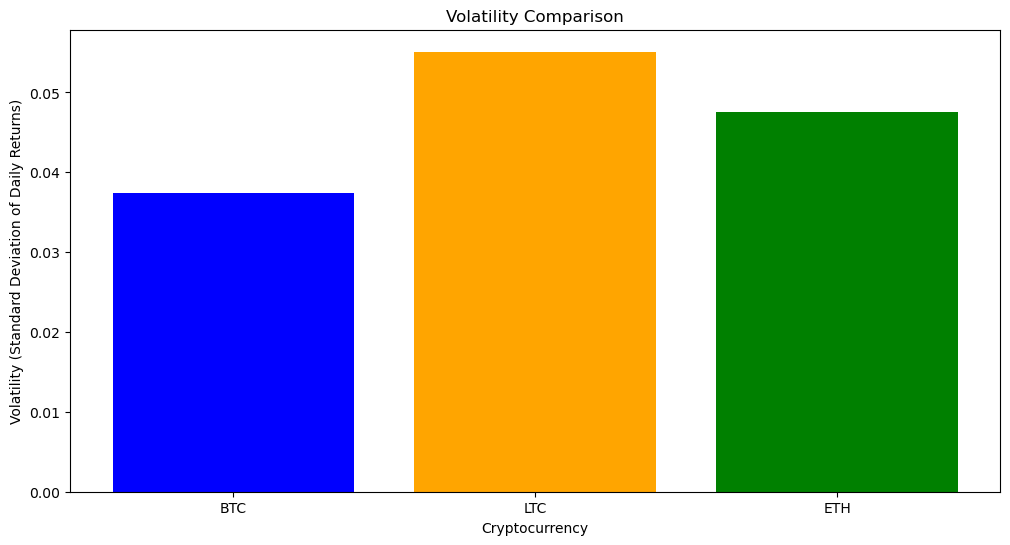

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data for BTC, LTC, and ETH into pandas DataFrames
df_btc = pd.read_csv('BTC-USD.csv', parse_dates=['Date'], index_col='Date')
df_ltc = pd.read_csv('LTC-USD.csv', parse_dates=['Date'], index_col='Date')
df_eth = pd.read_csv('ETH-USD.csv', parse_dates=['Date'], index_col='Date')

# Calculate daily returns
df_btc['Daily_Return'] = df_btc['Close'].pct_change()
df_ltc['Daily_Return'] = df_ltc['Close'].pct_change()
df_eth['Daily_Return'] = df_eth['Close'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_btc = df_btc['Daily_Return'].std()
volatility_ltc = df_ltc['Daily_Return'].std()
volatility_eth = df_eth['Daily_Return'].std()

# Print the calculated volatilities
print(f'Volatility for BTC: {volatility_btc:.4f}')
print(f'Volatility for LTC: {volatility_ltc:.4f}')
print(f'Volatility for ETH: {volatility_eth:.4f}')

# Visualize the volatility
plt.figure(figsize=(12, 6))
plt.bar(['BTC', 'LTC', 'ETH'], [volatility_btc, volatility_ltc, volatility_eth], color=['blue', 'orange', 'green'])
plt.title('Volatility Comparison')
plt.xlabel('Cryptocurrency')
plt.ylabel('Volatility (Standard Deviation of Daily Returns)')
plt.show()


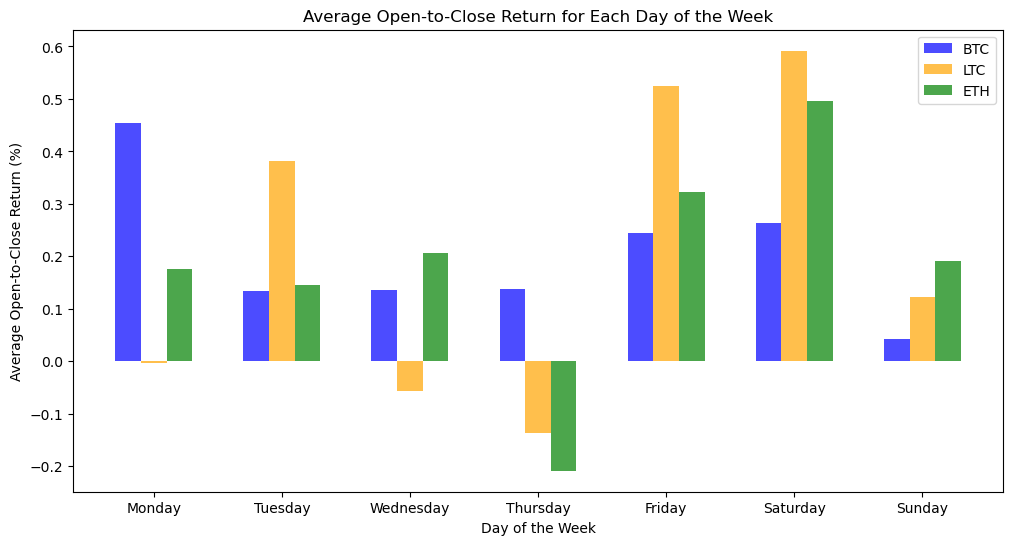

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np

# Load the CSV data for BTC, LTC, and ETH into pandas DataFrames
df_btc = pd.read_csv('BTC-USD.csv', parse_dates=['Date'], index_col='Date')
df_ltc = pd.read_csv('LTC-USD.csv', parse_dates=['Date'], index_col='Date')
df_eth = pd.read_csv('ETH-USD.csv', parse_dates=['Date'], index_col='Date')

# Calculate open-to-close daily returns
df_btc['Open_to_Close_Return'] = (df_btc['Close'] - df_btc['Open']) / df_btc['Open'] * 100
df_ltc['Open_to_Close_Return'] = (df_ltc['Close'] - df_ltc['Open']) / df_ltc['Open'] * 100
df_eth['Open_to_Close_Return'] = (df_eth['Close'] - df_eth['Open']) / df_eth['Open'] * 100

# Extract the day of the week for each data point
df_btc['Day_of_Week'] = df_btc.index.dayofweek
df_ltc['Day_of_Week'] = df_ltc.index.dayofweek
df_eth['Day_of_Week'] = df_eth.index.dayofweek

# Calculate average open-to-close return for each day of the week
avg_return_btc = df_btc.groupby('Day_of_Week')['Open_to_Close_Return'].mean()
avg_return_ltc = df_ltc.groupby('Day_of_Week')['Open_to_Close_Return'].mean()
avg_return_eth = df_eth.groupby('Day_of_Week')['Open_to_Close_Return'].mean()

# Use the unique days present in the data for better visualization
days_of_week = df_btc.index.day_name().unique()

# Rearrange days to start from Sunday
days_of_week = list(calendar.day_name)

# Set the width of the bars
bar_width = 0.2

# Set the x positions for the bars
r1 = np.arange(len(days_of_week))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Visualize the average open-to-close returns for each day of the week as side-by-side bars
plt.figure(figsize=(12, 6))

plt.bar(r1, avg_return_btc, width=bar_width, label='BTC', color='blue', alpha=0.7)
plt.bar(r2, avg_return_ltc, width=bar_width, label='LTC', color='orange', alpha=0.7)
plt.bar(r3, avg_return_eth, width=bar_width, label='ETH', color='green', alpha=0.7)

plt.title('Average Open-to-Close Return for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Open-to-Close Return (%)')
plt.xticks([r + bar_width for r in range(len(days_of_week))], days_of_week)  # Use the unique days for x-axis labels
plt.legend()
plt.show()


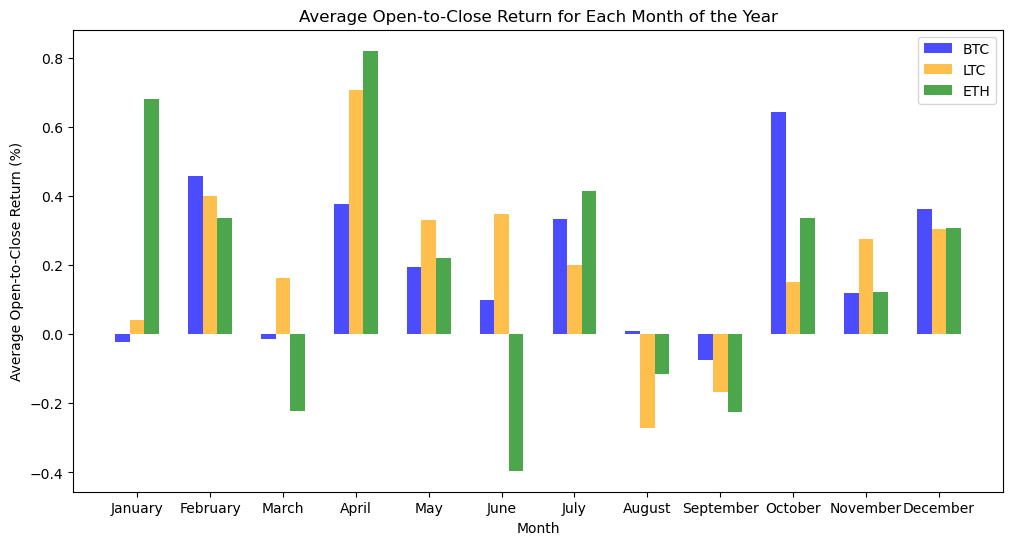

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import numpy as np

# Load the CSV data for BTC, LTC, and ETH into pandas DataFrames
df_btc = pd.read_csv('BTC-USD.csv', parse_dates=['Date'], index_col='Date')
df_ltc = pd.read_csv('LTC-USD.csv', parse_dates=['Date'], index_col='Date')
df_eth = pd.read_csv('ETH-USD.csv', parse_dates=['Date'], index_col='Date')

# Calculate open-to-close daily returns
df_btc['Open_to_Close_Return'] = (df_btc['Close'] - df_btc['Open']) / df_btc['Open'] * 100
df_ltc['Open_to_Close_Return'] = (df_ltc['Close'] - df_ltc['Open']) / df_ltc['Open'] * 100
df_eth['Open_to_Close_Return'] = (df_eth['Close'] - df_eth['Open']) / df_eth['Open'] * 100

# Extract the month of the year for each data point
df_btc['Month'] = df_btc.index.month
df_ltc['Month'] = df_ltc.index.month
df_eth['Month'] = df_eth.index.month

# Calculate average open-to-close return for each month of the year
avg_return_btc = df_btc.groupby('Month')['Open_to_Close_Return'].mean()
avg_return_ltc = df_ltc.groupby('Month')['Open_to_Close_Return'].mean()
avg_return_eth = df_eth.groupby('Month')['Open_to_Close_Return'].mean()

# Use the unique months present in the data for better visualization
months_of_year = df_btc.index.month_name().unique()

# Set the width of the bars
bar_width = 0.2

# Set the x positions for the bars
r1 = np.arange(len(months_of_year))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Visualize the average open-to-close returns for each month of the year as side-by-side bars
plt.figure(figsize=(12, 6))

plt.bar(r1, avg_return_btc, width=bar_width, label='BTC', color='blue', alpha=0.7)
plt.bar(r2, avg_return_ltc, width=bar_width, label='LTC', color='orange', alpha=0.7)
plt.bar(r3, avg_return_eth, width=bar_width, label='ETH', color='green', alpha=0.7)

plt.title('Average Open-to-Close Return for Each Month of the Year')
plt.xlabel('Month')
plt.ylabel('Average Open-to-Close Return (%)')
plt.xticks([r + bar_width for r in range(len(months_of_year))], months_of_year)  # Use the unique months for x-axis labels
plt.legend()
plt.show()
